### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

### Importing Dataset

In [2]:
train_df = pd.read_csv('C:/Users/deepd/Downloads/archive (2)/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('C:/Users/deepd/Downloads/archive (2)/fashion-mnist_test.csv', sep = ',')

### EDA

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Below we can see that there's no null or missing value available in datset hence we won't perfrm missing value trweatment

In [5]:
train_df.isnull().sum()
test_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [6]:
train_data = np.array(train_df, dtype = 'float32')

###  Feature Engineering
#### here we're converting the image data into an array for further computation

In [7]:
test_data = np.array(test_df, dtype='float32')

In [8]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]


In [9]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

### Data Visualisation

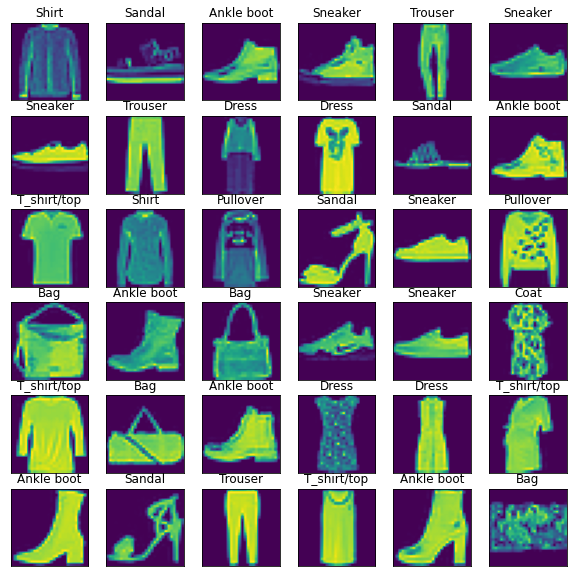

In [10]:

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

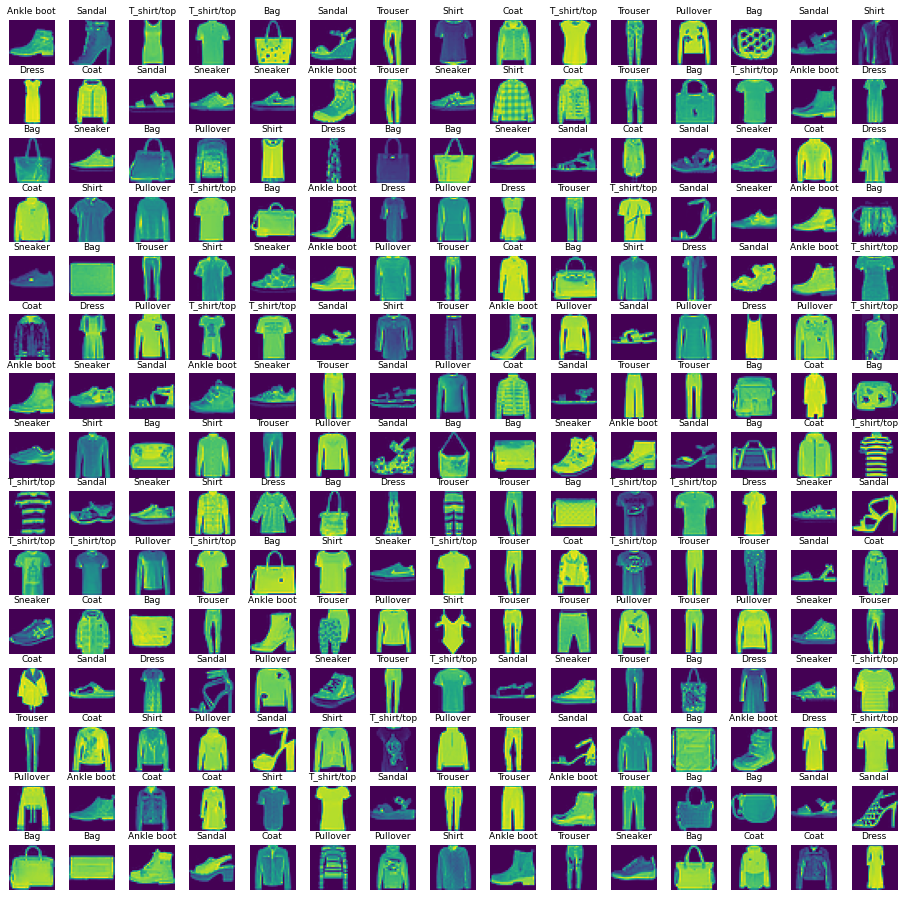

In [11]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [12]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [13]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

### Convolutional Neural Network( creating and compiling)

In [14]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')])

In [15]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [16]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)


Epoch 1/75
12/12 [==============================] - 13s 1s/step - loss: 2.0217 - accuracy: 0.3063 - val_loss: 1.3815 - val_accuracy: 0.5811
Epoch 2/75
12/12 [==============================] - 11s 956ms/step - loss: 1.2343 - accuracy: 0.6226 - val_loss: 0.8636 - val_accuracy: 0.7362
Epoch 3/75
12/12 [==============================] - 11s 957ms/step - loss: 0.8033 - accuracy: 0.7450 - val_loss: 0.6530 - val_accuracy: 0.7728
Epoch 4/75
12/12 [==============================] - 11s 945ms/step - loss: 0.6292 - accuracy: 0.7794 - val_loss: 0.5646 - val_accuracy: 0.8023
Epoch 5/75
12/12 [==============================] - 11s 938ms/step - loss: 0.5544 - accuracy: 0.8082 - val_loss: 0.5174 - val_accuracy: 0.8182
Epoch 6/75
12/12 [==============================] - 11s 930ms/step - loss: 0.5177 - accuracy: 0.8204 - val_loss: 0.4829 - val_accuracy: 0.8305
Epoch 7/75
12/12 [==============================] - 11s 954ms/step - loss: 0.4776 - accuracy: 0.8335 - val_loss: 0.4574 - val_accuracy: 0.8399
Ep

12/12 [==============================] - 11s 934ms/step - loss: 0.2493 - accuracy: 0.9103 - val_loss: 0.2683 - val_accuracy: 0.9047
Epoch 59/75
12/12 [==============================] - 11s 947ms/step - loss: 0.2498 - accuracy: 0.9114 - val_loss: 0.2672 - val_accuracy: 0.9053
Epoch 60/75
12/12 [==============================] - 11s 942ms/step - loss: 0.2408 - accuracy: 0.9140 - val_loss: 0.2664 - val_accuracy: 0.9058
Epoch 61/75
12/12 [==============================] - 11s 931ms/step - loss: 0.2434 - accuracy: 0.9128 - val_loss: 0.2679 - val_accuracy: 0.9047
Epoch 62/75
12/12 [==============================] - 11s 943ms/step - loss: 0.2504 - accuracy: 0.9116 - val_loss: 0.2658 - val_accuracy: 0.9069
Epoch 63/75
12/12 [==============================] - 11s 944ms/step - loss: 0.2397 - accuracy: 0.9143 - val_loss: 0.2650 - val_accuracy: 0.9078
Epoch 64/75
12/12 [==============================] - 11s 948ms/step - loss: 0.2361 - accuracy: 0.9165 - val_loss: 0.2673 - val_accuracy: 0.9057
Epoc

Text(0.5, 1.0, 'Train - Accuracy')

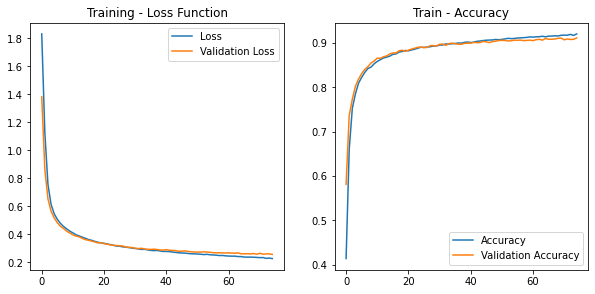

In [17]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [18]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2510
Test Accuracy : 0.9114


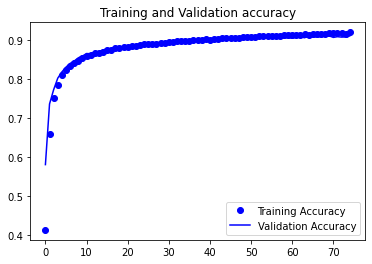

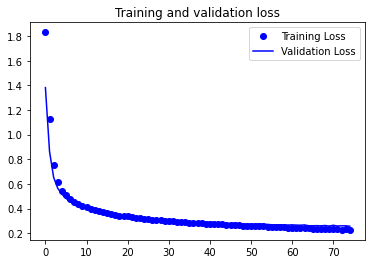

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### classification report

In [20]:
#Get the predictions for the test data
predicted_classes = cnn_model.predict_classes(x_test)
#Get the indices to be plotted
y_true = test_df.iloc[:, 0]
#correct = np.nonzero(predicted_classes==y_true)[0]
#incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.84      0.86      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.87      0.86      0.86      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.87      0.88      0.87      1000
     Class 5       0.98      0.96      0.97      1000
     Class 6       0.74      0.77      0.75      1000
     Class 7       0.95      0.95      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### Predicting & classifying results

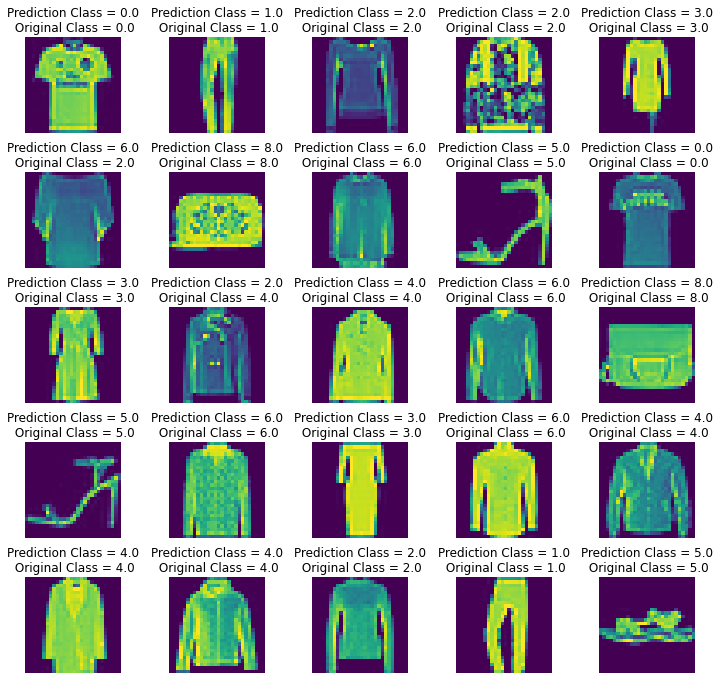

In [21]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)